In [1]:
# importing required module
import http.client as httplib


# function to check internet connectivity
def checkInternetHttplib(url="www.geeksforgeeks.org",
						timeout=3):
	connection = httplib.HTTPConnection(url,
										timeout=timeout)
	try:
		# only header requested for fast operation
		connection.request("HEAD", "/")
		connection.close() # connection closed
		print("Internet On")
		return True
	except Exception as exep:
		print(exep)
		return False


checkInternetHttplib("www.geeksforgeeks.org", 3)

Internet On


True

In [7]:
from pymodbus.client import ModbusTcpClient

ip = '192.168.0.113'
port = 502

register_address_map = {"TEMP_PV": 0,
                        "RH_PV": 2,
                        "RH_SV_Read_Only": 3,
                        "Program_Status": 4,
                        "TEMP_SV": 7,
                        "RH_SV_Read_Write": 16
                        } 
coil_address_map = {"Profile_Run": 0,
                    "Lamp_Command": 1,
                    "Manual_Run" : 2,
                    "Batch_Start_Flag": 3
                   }

# Initialize modbus connection
client = ModbusTcpClient(host=ip, port=port)
connection = client.connect()

In [10]:
print("\nReading coils:")
for key, value in coil_address_map.items():
    rd = client.read_coils(value)
    print()
    print(rd)
    print(f"{key: <10}: {rd.bits}")


Reading coils:

ReadCoilsResponse(8)
Profile_Run: [False, False, False, False, False, False, False, False]

ReadCoilsResponse(8)
Lamp_Command: [False, False, False, False, False, False, False, False]

ReadCoilsResponse(8)
Manual_Run: [False, False, False, False, False, False, False, False]

ReadCoilsResponse(8)
Batch_Start_Flag: [False, False, False, False, False, False, False, False]


In [19]:
# Write Coil
client.write_coil(1, False)

In [90]:
czt.command("WRITE_PROTECT_OFF")
czt.command("UPDATE_SETUP")
czt.command("WRITE_PROTECT_ON")

-1

In [1]:
import serial

In [2]:
# https://pythonforundergradengineers.com/python-arduino-potentiometer.html
ser = serial.Serial("/dev/ttyACM1", 9600, timeout=1)

SerialException: [Errno 2] could not open port /dev/ttyACM1: [Errno 2] No such file or directory: '/dev/ttyACM1'

In [215]:
float(ser.readline().decode().strip())
# ser.readline()

35.64

In [89]:
ser.close()

In [3]:
from pynq import PL, Overlay
from pynq import allocate
import new_det_data_acquisition_common as common
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
%matplotlib inline

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m' 
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
ov = Overlay("./overlays/test_2det_commanding.bit")
# czt = ov.AXI_CZT_AXIS_0.AXI_CZT_Controller                # Bottom slot on PYNQ board
czt = ov.AXI_CZT_AXIS_1.AXI_CZT_Controller                  # Up slot
reset_pl = ov.Reset_system.reset_gpio.channel1[0].on
dma_channel = ov.DMA.axi_dma_0.recvchannel
wr_data_count = ov.AXIS_Combine.axi_gpio_0.channel1.read
rd_data_count = ov.AXIS_Combine.axi_gpio_0.channel2.read

In [248]:
print(czt.command("BREAK"))      # Should return None

None


In [249]:
print(czt.read_serial())

500040


In [250]:
# To set energy threshold
czt.set_threshold(40)             # 20 == 20kev

In [188]:
reset_pl()
test_reply_commands = ['READ_SERIAL_LSB',
             'READ_SERIAL_MSB',
             'READ_FIRMWARE_VERSION',
             'READ_MODULE_VERSION',
             'EEPROM_CHECKSUM',
             'GET_CLOCK',
             'GET_EMULATOR',
             'GET_GPIO',
             'GET_PEAKING_TIME',
             'GET_THRESHOLD',
             'READ_TEMPERATURE',
             'READ_STATUS'
             ]
print(color.BOLD + "Command                      CZT " + color.END)
for comm in test_reply_commands:
    print(f"{comm:.<25}" + f"{czt.command(comm):>7}")

Command                      CZT 
READ_SERIAL_LSB..........  41288
READ_SERIAL_MSB..........      7
READ_FIRMWARE_VERSION....      6
READ_MODULE_VERSION......     99
EEPROM_CHECKSUM..........     58
GET_CLOCK................      2
GET_EMULATOR.............   1030
GET_GPIO.................      0
GET_PEAKING_TIME.........      5
GET_THRESHOLD............    204
READ_TEMPERATURE.........    204
READ_STATUS..............   1030


In [189]:
# def foo(x):
#    return (x & ((1<<11) - 1))
# #  - (x & (1<<11))

In [254]:
czt.command("READ_TEMPERATURE")

22

In [192]:
# temp_data = 1023
# (f'{temp_data:#014b}')[0]

In [255]:
# Store detector's values
###### Detector's own temperature LEFT to be taken #########
det_serial_number = czt.read_serial()
det_threshold_value = czt.get_threshold()
det_peaking_time = czt.command("GET_PEAKING_TIME")

In [257]:
# Confirm the values before measurement
#Printing the values to confirm faithful completion
print("Serial No: ", det_serial_number)
print("Threshold Set (keV): ", (det_threshold_value))
print("Peaking time: ", det_peaking_time)

Serial No:  500040
Threshold Set (keV):  39.882697947214076
Peaking time:  5


#### Are the above values correct? If not then perform a BREAK command and redo the steps.

####

In [195]:
# Get testing conditions
print(color.BOLD + "Please enter the testing conditions before performing measurement: " + color.END)
room_temp_at_start_of_measurement = input("Enter current room temperature in C: ")
room_humidity_at_start_of_measurement = input("Enter current room humidity in % RH: ")
time_at_start_of_measurement = input("Enter current time in hrs format: ")

Please enter the testing conditions before performing measurement: 
Enter current room temperature in C: 27
Enter current room humidity in % RH: 39
Enter current time in hrs format: 1658


In [196]:
det_HV_bias = input("Please enter HV bias voltage set in V: ")
radiation_measured = input("Enter type of radiation which is to be measured (bkg for background): ")

Please enter HV bias voltage set in V: 0
Enter type of radiation which is to be measured (bkg for background): bkg


In [197]:
date = input("Enter today's date in YYYYMMDD format: ")
# Concatenating temp and humidity
date = date + "_" + room_temp_at_start_of_measurement + "_" + room_humidity_at_start_of_measurement + "_" + det_HV_bias
date

Enter today's date in YYYYMMDD format: 20240215


'20240215_27_39_0'

In [198]:
# Not sure what the function of this cell is, at present it feels redundant
czt.command("EVENT_ON")
print(dma_channel.idle)
print(wr_data_count(), rd_data_count())

czt.command("EVENT_OFF")

False
0 0


## <font color='green'> Round 1: Measure background radiation with ALL pixels enabled</font>

In [258]:
# Scan the status of all channels, enable the disabled pixels
czt.scan_all_channels()
if czt.num_disabled > 0:
    print(f"%d number of pixels are currently disabled.", czt.num_disabled)
    print("They are ", str(czt.disabled_channel_list))
    for i in czt.disabled_channel_list:
        czt.enable_channel(i)
    print("Enabled the above disabled pixels. Kindly rerun this cell to confirm.")
else:
    print("All pixels are enabled.")

All pixels are enabled.


FYI, One packet is 128 events.

In [261]:
event_data_buffer = allocate(shape=(128,), dtype=np.uint64)
main_buffer = []
reset_pl()

In [262]:
print(len(main_buffer))

0


#### Cover the detector completely with a black cloth

In [202]:
event_data_buffer = allocate(shape=(128,), dtype=np.uint64)
main_buffer = []
reset_pl()

In [203]:
print(len(main_buffer))

0


In [270]:
print(czt.command("BREAK"))

None


In [271]:
# Check one final time connection with detector
print(czt.read_serial())

500040


npackets = 500 with all pixels enabled is good to find out noisy pixels.
Take a cut-off of 50 counts and disable those noisy pixels.

In [273]:
czt.command("READ_TEMPERATURE")

22

In [267]:
check = input("Has the detector been covered with a black cloth (Y/N) ? ")

# det_temp_at_start_of_measurement_round_1 = input("Enter LM35 temperature reading in C: ")


if check == 'Y':
    # Perform Measurement
    npackets = 1000                          
    dma_channel.start()
    dma_channel.transfer(event_data_buffer)
    czt.command("EVENT_ON")

    start_time = time.time()
    for i in range(npackets):
        dma_channel.wait()
        main_buffer.extend(event_data_buffer.tolist())
        dma_channel.transfer(event_data_buffer)
        print(i,end=" ")
    
    stop_time = time.time()    
    time_to_measure_round_1 = stop_time - start_time       # This is in seconds

    czt.command("EVENT_OFF")
    
    npackets = f"{npackets:04d}"          # Makes npacket a 4 digit string, used to store it later
else:
    print("\nKindly cover it with a black cloth and rerun this cell.")

Has the detector been covered with a black cloth (Y/N) ? Y
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262

In [268]:
# Copy measured data
parse_main_buffer = common.parse_event_data(main_buffer)
det = []
for x in parse_main_buffer:
    det.append(x)

times_det  = [x[0] for x in det]
pixels_det = [x[2] for x in det]
energy_det = [x[3] for x in det]

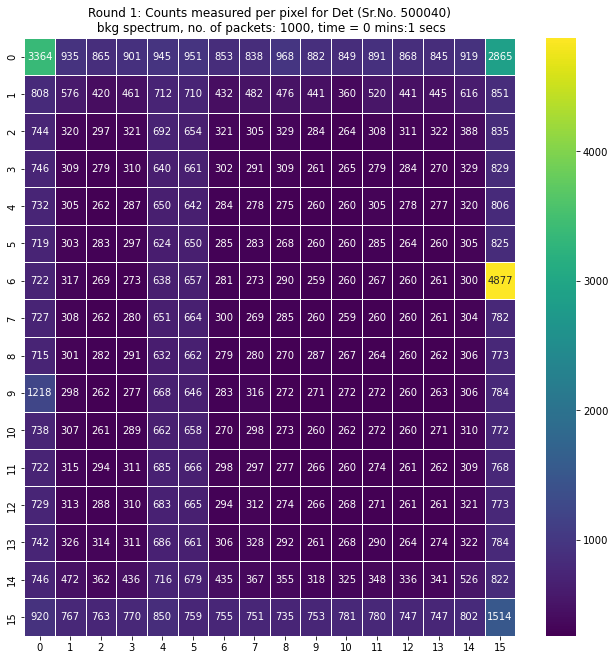

In [269]:
# Plot no. of counts measured per pixel on a 2D grid

minutes, secs = divmod(round(time_to_measure_round_1), 60)

pixhist = np.bincount(pixels_det, minlength=256)
plt.figure(figsize=(11,11))
plt.title('Round 1: Counts measured per pixel for Det (Sr.No. ' + str(det_serial_number) + ")\n "
          + radiation_measured +" spectrum, " + "no. of packets: " + str(npackets) + ", time = " + f"{minutes} mins:{secs} secs")
sns.heatmap(pixhist.reshape((16,16)), cmap="viridis", linewidths=1, annot= True, fmt=".0f")

# Saving of plot
if not os.path.exists(date):
    os.makedirs(date)
# 20230831_det_7183_bkg_pkts_500_1300_heatmap_round_1.txt
path = date + "//"
file_name = (date + "_det_" + str(det_serial_number) + "_round_1_" + radiation_measured + "_pkts_" + str(npackets)
            + "_" + time_at_start_of_measurement + "_heatmap.png")

plt.savefig(path + file_name, dpi=300)

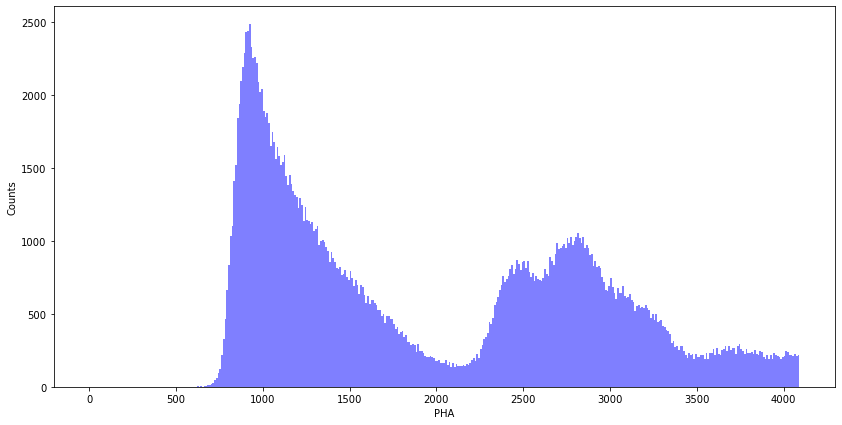

In [243]:
# Plotting spectrum
plt.figure(figsize=(14,7))
plt.hist(energy_det, bins=range(0,4096,10),alpha = 0.5, color= 'b')
plt.xlabel("PHA")
plt.ylabel("Counts")

path = date + "//"
file_name = (date + "_det_" + str(det_serial_number) + "_round_1_" + radiation_measured + "_pkts_" + str(npackets)
            + "_" + time_at_start_of_measurement + "_spectrum.png")

plt.savefig(path + file_name, dpi=300)

In [2]:
# Generating file name for this round
file_name = date + "_det_" + str(det_serial_number) + "_round_1_" + radiation_measured + "_pkts_" + str(npackets) + "_" + time_at_start_of_measurement
file_name_round_1 = file_name + '.txt'

# Storing measurement data in it
# Saving of plot
if not os.path.exists(date):
    os.makedirs(date)
with open(date + "//" + file_name_round_1, "w") as file:
    file.write(str(main_buffer))

NameError: name 'date' is not defined

In [93]:
czt.scan_all_channels()
print(f"Number of pixels that gave data: {len(np.unique(pixels_det))}\nNumber of disabled pixels: {czt.num_disabled}")

# To find noisy pixels and disable them
det_noisy_pixels_round_1 = []
pixel_count_cut_off_round_1 = 1500
for i,j in enumerate(pixhist):
    if j > pixel_count_cut_off_round_1:
        det_noisy_pixels_round_1.append(i)
        
print(f"No. of pixels with counts >{pixel_count_cut_off_round_1}: ", len(det_noisy_pixels_round_1))
print(f"Pixels with counts >{pixel_count_cut_off_round_1} are: \n",det_noisy_pixels_round_1, end=' ')
# raw_heatmap_stored_data = [len(np.unique(pixels_det)), czt.num_disabled, pixel_count_cut_off, det_noisy_pixels]
# print(raw_heatmap_stored_data,  end=' ')

Number of pixels that gave data: 256
Number of disabled pixels: 0
No. of pixels with counts >1500:  59
Pixels with counts >1500 are: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 31, 32, 47, 48, 63, 64, 79, 80, 95, 96, 111, 112, 127, 143, 144, 159, 160, 175, 176, 191, 192, 207, 208, 223, 224, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255] 

In [47]:
# Recheck the connection
print(czt.command("BREAK"))
print(czt.read_serial())

None
500040


In [95]:
# Now disabling above noisy pixels with counts greater than cut-off
for i in det_noisy_pixels_round_1:
    print(i)
    czt.disable_channel(i)
czt.scan_all_channels()

print("Number of pixels to disable: ", len(det_noisy_pixels_round_1))
print(f"Number of pixels disabled: {czt.num_disabled}")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
31
32
47
48
63
64
79
80
95
96
111
112
127
143
144
159
160
175
176
191
192
207
208
223
224
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
Number of pixels to disable:  59
Number of pixels disabled: 59


## <font color='green'> Round 2: Measure background radiation with noisy pixels disabled from Round 1 data</font>

In [89]:
czt.scan_all_channels()
print(len(czt.disabled_channel_list))
print(czt.disabled_channel_list)

0
[]


In [90]:
event_data_buffer = allocate(shape=(128,), dtype=np.uint64)
main_buffer = []
reset_pl()

In [91]:
print(len(main_buffer))

0


In [88]:
# Recheck the connection
print(czt.command("BREAK"))
print(czt.read_serial())

None
500040


npackets =  seems good for Round 2

In [92]:
check = input("Has the detector been covered with a black cloth (Y/N) ? ")

# det_temp_at_start_of_measurement_round_2 = input("Enter LM35 temperature reading in C: ")

if check == 'Y':
    # Perform Measurement
    npackets = 10000                         
    dma_channel.start()
    dma_channel.transfer(event_data_buffer)
    czt.command("EVENT_ON")

    start_time = time.time()
    for i in range(npackets):
        dma_channel.wait()
        main_buffer.extend(event_data_buffer.tolist())
        dma_channel.transfer(event_data_buffer)
        print(i,end=" ")
    
    stop_time = time.time()    
    time_to_measure_round_2 = stop_time - start_time       # This is in seconds

    czt.command("EVENT_OFF")
    
    npackets = f"{npackets:04d}"          # Makes npacket a 4 digit string, used to store it later
else:
    print("\nKindly cover it with a black cloth and rerun this cell.")

Has the detector been covered with a black cloth (Y/N) ? Y
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262

In [93]:
# Copy measured data
parse_main_buffer = common.parse_event_data(main_buffer)
det = []
for x in parse_main_buffer:
    det.append(x)

times_det  = [x[0] for x in det]
pixels_det = [x[2] for x in det]
energy_det = [x[3] for x in det]

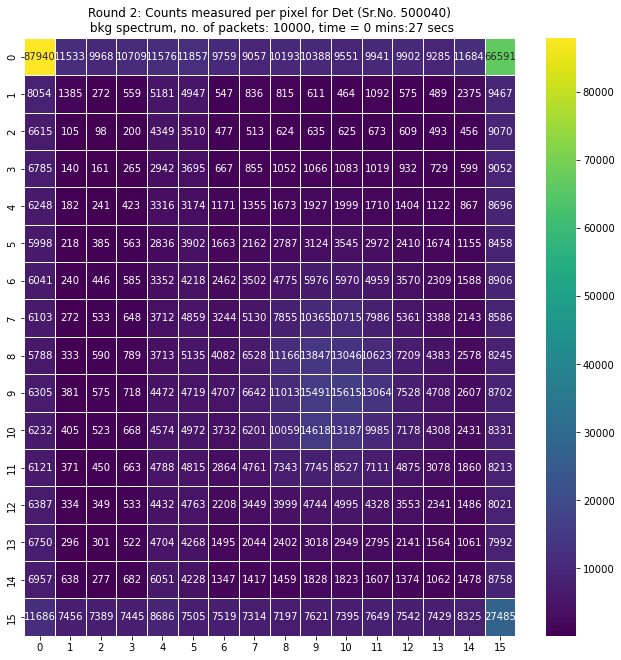

In [94]:
# Plot no. of counts measured per pixel on a 2D grid
minutes, secs = divmod(round(time_to_measure_round_2), 60)

pixhist = np.bincount(pixels_det, minlength=256)
plt.figure(figsize=(11,11))
plt.title('Round 2: Counts measured per pixel for Det (Sr.No. ' + str(det_serial_number) + ")\n "
          + radiation_measured +" spectrum, " + "no. of packets: " + str(npackets) + ", time = " + f"{minutes} mins:{secs} secs")
sns.heatmap(pixhist.reshape((16,16)), cmap="viridis", linewidths=1, annot= True, fmt=".0f")

# Saving of plot
if not os.path.exists(date):
    os.makedirs(date)
# 20230831_det_7183_bkg_pkts_500_1300_heatmap_round_1.txt
path = date + "//"
file_name = (date + "_det_" + str(det_serial_number) + "_round_2_" + radiation_measured + "_pkts_" + str(npackets)
            + "_" + time_at_start_of_measurement + "_heatmap.png")

plt.savefig(path + file_name, dpi=300)

In [ ]:
# Plotting spectrum
plt.figure(figsize=(14,7))
plt.hist(energy_det, bins=range(0,4096,10),alpha = 0.5, color= 'b')
plt.xlabel("PHA")
plt.ylabel("Counts")

path = date + "//"
file_name = (date + "_det_" + str(det_serial_number) + "_round_2_" + radiation_measured + "_pkts_" + str(npackets)
            + "_" + time_at_start_of_measurement + "_spectrum.png")

plt.savefig(path + file_name, dpi=300)

In [ ]:
# Generating file name for this round
file_name = date + "_det_" + str(det_serial_number) + "_round_2_" + radiation_measured + "_pkts_" + str(npackets) + "_" + time_at_start_of_measurement
file_name_round_2 = file_name + '.txt'

# Storing measurement data in it
# Saving of plot
if not os.path.exists(date):
    os.makedirs(date)
with open(date + "//" + file_name_round_2, "w") as file:
    file.write(str(main_buffer))

In [377]:
print(czt.command("BREAK"))
print(czt.read_serial())
czt.scan_all_channels()
print(f"Number of pixels that gave data: {len(np.unique(pixels_det))}\nNumber of disabled pixels: {czt.num_disabled}")

# To find noisy pixels and disable them
det_noisy_pixels_round_2 = []
pixel_count_cut_off_round_2 = 1000
for i,j in enumerate(pixhist):
    if j > pixel_count_cut_off_round_2:
        det_noisy_pixels_round_2.append(i)

print(f"No. of pixels with counts >{pixel_count_cut_off_round_2}: ", len(det_noisy_pixels_round_2))
print(f"Pixels with counts >{pixel_count_cut_off_round_2} are: \n",det_noisy_pixels_round_2, end=' ')

None
500040
Number of pixels that gave data: 232
Number of disabled pixels: 24
No. of pixels with counts >1000:  11
Pixels with counts >1000 are: 
 [3, 14, 47, 95, 111, 127, 128, 207, 208, 223, 250] 

In [151]:
# Recheck the connection
print(czt.command("BREAK"))
print(czt.read_serial())

None
500040


In [379]:
# Now disabling above noisy pixels with counts greater than cut-off
for i in det_noisy_pixels_round_2:
    czt.disable_channel(i)
czt.scan_all_channels()

det_noisy_pixels = det_noisy_pixels_round_1 + det_noisy_pixels_round_2
print("Number of pixels to disable: ", len(det_noisy_pixels))
print(f"Number of pixels disabled: {czt.num_disabled}")
if len(det_noisy_pixels) == czt.num_disabled:
    print("All noisy pixels successfully disabled.")
else:
    print("Something Wrong, All noisy pixels were not successfully disabled.")

Number of pixels to disable:  35
Number of pixels disabled: 35
All noisy pixels successfully disabled.


### <font color='green'> Round 3: Measure background radiation after all noisy pixels have been disabled through Rounds 1 and 2</font>

In [105]:
czt.scan_all_channels()
print(len(czt.disabled_channel_list))
print(czt.disabled_channel_list)

59
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 31, 32, 47, 48, 63, 64, 79, 80, 95, 96, 111, 112, 127, 143, 144, 159, 160, 175, 176, 191, 192, 207, 208, 223, 224, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255]


In [236]:
# temp_list_to_disable = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
#                         21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 46, 47, 48, 62, 63, 
#                         64, 65, 78, 79, 80, 81, 94, 95, 96, 97, 110, 111, 112, 113, 126, 127, 128, 
#                         129, 142, 143, 144, 145, 158, 159, 160, 161, 174, 175, 176, 177, 190, 191,
#                         192, 193, 206, 207, 208, 209, 222, 223, 224, 225, 226, 227, 228, 229, 230, 
#                         231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 
#                         246, 247, 248, 249, 250, 251, 252, 253, 254, 255]

temp_list_to_disable = [111, 144]

for i in temp_list_to_disable:
    czt.disable_channel(i)

In [106]:
event_data_buffer = allocate(shape=(128,), dtype=np.uint64)
main_buffer = []
reset_pl()

In [107]:
print(len(main_buffer))

0


In [108]:
print(czt.read_serial())

500040


In [111]:
# Recheck the connection
print(czt.command("BREAK"))
print(czt.read_serial())

None
500040


npackets = 1 should be more than enough for Round 3, approx time it takes is 20-25 mins

In [112]:
check = input("Has the detector been covered with a black cloth (Y/N) ? ")

# det_temp_at_start_of_measurement_round_3 = input("Enter LM35 temperature reading in C: ")

if check == 'Y':
    # Perform Measurement
    npackets =  1000
    dma_channel.start()
    dma_channel.transfer(event_data_buffer)
    czt.command("EVENT_ON")

    start_time = time.time()
    for i in range(npackets):
        dma_channel.wait()
        main_buffer.extend(event_data_buffer.tolist())
        dma_channel.transfer(event_data_buffer)
        print(i,end=" ")
    
    stop_time = time.time()    
    time_to_measure_round_3 = stop_time - start_time       # This is in seconds

    czt.command("EVENT_OFF")
    
    npackets = f"{npackets:04d}"          # Makes npacket a 4 digit string, used to store it later
else:
    print("\nKindly cover it with a black cloth and rerun this cell.")

Has the detector been covered with a black cloth (Y/N) ? Y
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262

In [114]:
# Copy measured data
parse_main_buffer = common.parse_event_data(main_buffer)
det = []
for x in parse_main_buffer:
    det.append(x)

times_det  = [x[0] for x in det]
pixels_det = [x[2] for x in det]
energy_det = [x[3] for x in det]

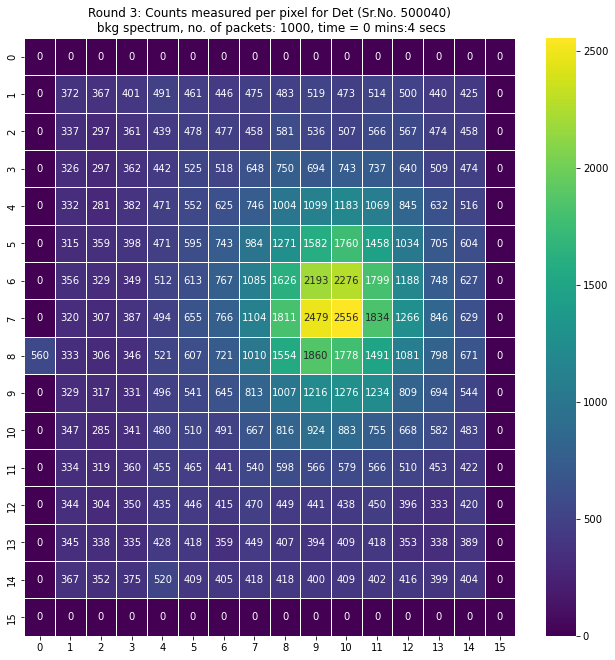

In [115]:
# Plot no. of counts measured per pixel on a 2D grid
minutes, secs = divmod(round(time_to_measure_round_3), 60)


pixhist = np.bincount(pixels_det, minlength=256)
plt.figure(figsize=(11,11))
plt.title('Round 3: Counts measured per pixel for Det (Sr.No. ' + str(det_serial_number) + ")\n "
          + radiation_measured +" spectrum, " + "no. of packets: " + str(npackets) + ", time = " + f"{minutes} mins:{secs} secs")
sns.heatmap(pixhist.reshape((16,16)), cmap="viridis", linewidths=1, annot= True, fmt=".0f")

# Saving of plot
if not os.path.exists(date):
    os.makedirs(date)
# 20230831_det_7183_bkg_pkts_500_1300_heatmap_round_1.txt
path = date + "//"
file_name = (date + "_det_" + str(det_serial_number) + "_round_3_" + radiation_measured + "_pkts_" + str(npackets)
            + "_" + time_at_start_of_measurement + "_heatmap.png")

plt.savefig(path + file_name, dpi=300)

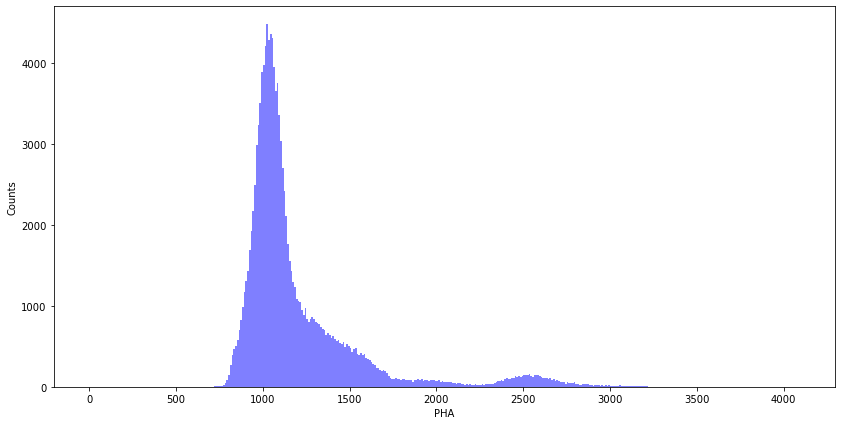

In [116]:
# Plotting spectrum
plt.figure(figsize=(14,7))
plt.hist(energy_det, bins=range(0,4096,10),alpha = 0.5, color= 'b')
plt.xlabel("PHA")
plt.ylabel("Counts")

path = date + "//"
file_name = (date + "_det_" + str(det_serial_number) + "_round_3_" + radiation_measured + "_pkts_" + str(npackets)
            + "_" + time_at_start_of_measurement + "_spectrum.png")

plt.savefig(path + file_name, dpi=300)

In [ ]:
# Plotting spectrum
plt.figure(figsize=(14,7))
plt.hist(energy_det, bins=range(0,1500,10),alpha = 0.5, color= 'b')
plt.xlabel("PHA")
plt.ylabel("Counts")

path = date + "//"
file_name = (date + "_det_" + str(det_serial_number) + "_round_3_" + radiation_measured + "_pkts_" + str(npackets)
            + "_" + time_at_start_of_measurement + "_spectrum.png")

plt.savefig(path + file_name, dpi=300)

In [155]:
print(czt.command("BREAK"))
print(czt.read_serial())
czt.scan_all_channels()
print(f"Number of pixels that gave data: {len(np.unique(pixels_det))}\nNumber of disabled pixels: {czt.num_disabled}")

# To find noisy pixels and disable them
det_noisy_pixels_round_3 = []
pixel_count_cut_off_round_3 = 10
for i,j in enumerate(pixhist):
    if j > pixel_count_cut_off_round_3:
        det_noisy_pixels_round_3.append(i)

print(f"No. of pixels with counts >{pixel_count_cut_off_round_3}: ", len(det_noisy_pixels_round_3))
print(f"Pixels with counts >{pixel_count_cut_off_round_3} are: \n",det_noisy_pixels_round_3, end=' ')

None
7183
Number of pixels that gave data: 172
Number of disabled pixels: 85
No. of pixels with counts >10:  26
Pixels with counts >10 are: 
 [33, 62, 65, 81, 94, 97, 110, 113, 129, 145, 158, 161, 177, 190, 193, 209, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236] 

In [170]:
# Recheck the connection
print(czt.command("BREAK"))
print(czt.read_serial())

None
470752271


In [112]:
len(det_noisy_pixels_round_1)

256

In [156]:
# Now disabling above noisy pixels with counts greater than cut-off
for i in det_noisy_pixels_round_3:
    czt.disable_channel(i)
czt.scan_all_channels()

det_noisy_pixels = det_noisy_pixels_round_1 + det_noisy_pixels_round_2 + det_noisy_pixels_round_3
print("Number of pixels to disable: ", len(det_noisy_pixels))
print(f"Number of pixels disabled: {czt.num_disabled}")
if len(det_noisy_pixels) == czt.num_disabled:
    print("All noisy pixels successfully disabled.")
else:
    print("Something Wrong, All noisy pixels were not successfully disabled.")

Number of pixels to disable:  315
Number of pixels disabled: 111
Something Wrong, All noisy pixels were not successfully disabled.


In [319]:
print(czt.command("BREAK"))
print(czt.read_serial())
czt.scan_all_channels()
print(f"Number of pixels that gave data: {len(np.unique(pixels_det))}\nNumber of disabled pixels: {czt.num_disabled}")

None
4741
Number of pixels that gave data: 241
Number of disabled pixels: 243


In [297]:
# Generating file name for this round
file_name = date + "_det_" + str(det_serial_number) + "_round_3_" + radiation_measured + "_pkts_" + str(npackets) + "_" + time_at_start_of_measurement
file_name_round_3 = file_name + '.txt'
file_name_round_3

'20230831_det_7183_bkg_pkts_1_1300.txt'

In [298]:
# Storing measurement data in it
# Saving of plot
if not os.path.exists(date):
    os.makedirs(date)
with open(date + "//" + file_name_round_3, "w") as file:
    file.write(str(main_buffer))

In [299]:
# Combining all the supplementary data
supplementary_data = [
                        room_temp_at_start_of_measurement,
                        room_humidity_at_start_of_measurement,
                        det_temp_at_start_of_measurement_round_1,
                        det_temp_at_start_of_measurement_round_2,
                        det_temp_at_start_of_measurement_round_3,
                        time_at_start_of_measurement,
                        det_serial_number,
                        round(det_threshold_value,2),
                        det_peaking_time,
                        det_HV_bias,
                        round(time_to_measure_round_1,2),
                        round(time_to_measure_round_2,2),
                        round(time_to_measure_round_3,2),
                        det_noisy_pixels
                    ]

file_name_supplementary = file_name + "_supplementary.txt"
file_name_supplementary

'20230831_det_7183_bkg_pkts_1_1300_supplementary.txt'

In [300]:
# Storing the supplementary data in a file
if not os.path.exists(date):
    os.makedirs(date)
with open(date + "//" + file_name_supplementary, "w") as file:
    file.write(str(supplementary_data))